<a href="https://colab.research.google.com/github/Layssavb/Estudo-de-curvas-de-luz-utilizando-LightKurve/blob/main/Guia_uso_lightkurve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de Curvas de Luz com Lightkurve

**Autor:** Layssa V. B.  
**Orientação:** Bonnie Z.

**Data:** 2025-09-22

Este notebook tem como objetivo demonstrar boas práticas no estudo e análise de curvas de luz astronômicas utilizando a biblioteca [Lightkurve](https://docs.lightkurve.org/).

Serão apresentados métodos para busca, visualização, normalização e comparação de curvas de luz de diferentes missões (TESS, K2), utilizando como exemplo a estrela AA Tau (TIC 268510757 / EPIC 247810494 / ktwo247810494).



**Objetivo:** Demonstrar como buscar curvas de luz, entender as diferenças entre pipelines e setores, normalizar dados e identificar periodicidades, com exemplos aplicados à estrela AA Tau.

Ao final, você será capaz de:
- Baixar e comparar curvas de luz de diferentes missões e pipelines.
- Decidir qual dado usar para sua análise científica.
- Realizar análises básicas de periodicidade.

*Recomenda-se executar este guia em um ambiente Jupyter ou Google Colab.*

## Sumário

1. [Instalação e Importação](#introducao)
2. [Funções auxiliares](#instalacao)
3. [Identificação do alvo e busca de dados](#busca)
4. [Visualização e Separação](#visualizacao)
5. [Mesmo processo para outro telescópio](#escolha)
6. [Normalização](#normalizacao)
7.  [Conclusão](#conclusao)
8. [ Referências ](#referencias)

## 1. Instalação e Importação das Bibliotecas

**Requisitos:** lightkurve, matplotlib

In [1]:
# !pip install lightkurve

In [ ]:
#Estudo sobre curvas de luz usando lightkurve

%matplotlib inline
import lightkurve as lk
import matplotlib.pyplot as plt

#Importamos matplotlib para auxiliar na plotagem de gráficos.

## 2. Funções Auxiliares

Função para busca e plotagem de curvas de luz.

In [ ]:
type(lk.search_lightcurve)
#Usaremos a função que procura dados de missões especificadas pelos parâmetros.

function



## 3. Identificação do Alvo e Busca dos Dados

- **AA Tau**: TIC 268510757 (TESS), EPIC 247810494 ou ktwo247810494 (K2)
- **Missões disponíveis**: TESS, K2


In [ ]:
# Encontrando a identidade em cada telescópio do objeto de estudo, no caso AA Tau

search_result = lk.search_lightcurve("AA Tau")
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 13,2017,K2,1800,ktwo247810494,0.0
1,K2 Campaign 13,2017,EVEREST,1800,ktwo247810494,0.0
2,K2 Campaign 13,2017,K2SFF,1800,ktwo247810494,0.0
3,K2 Campaign 13,2017,K2YSO,1800,EPIC 247810494,0.0
4,TESS Sector 44,2021,SPOC,120,268510757,0.0
5,TESS Sector 43,2021,SPOC,120,268510757,0.0
6,TESS Sector 70,2023,SPOC,20,268510757,0.0
7,TESS Sector 71,2023,SPOC,20,268510757,0.0
8,TESS Sector 71,2023,SPOC,120,268510757,0.0


Com isso conseguimos usar a identidade da estrela observada:
Para K2: ktwo247810494 e EPIC 247810494
Para TESS: TIC 268510757

# Proximo passo: Plotar curvas de luz

In [ ]:
# 1- plotando as curvas de luz, os  parâmetros usados podem ser mais específicos, utilizando mission, year, exptime, author e targetname.
search_resulttess = lk.search_lightcurve("TIC 268510757", mission="TESS")
search_resulttess

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 43,2021,SPOC,120,268510757,0.0
1,TESS Sector 44,2021,SPOC,120,268510757,0.0
2,TESS Sector 70,2023,SPOC,20,268510757,0.0
3,TESS Sector 71,2023,SPOC,20,268510757,0.0
4,TESS Sector 70,2023,SPOC,120,268510757,0.0
5,TESS Sector 71,2023,SPOC,120,268510757,0.0
6,TESS Sector 43,2021,TESS-SPOC,600,268510757,0.0
7,TESS Sector 44,2021,TESS-SPOC,600,268510757,0.0
8,TESS Sector 70,2023,TESS-SPOC,200,268510757,0.0


A plotagem anterior apresenta diversas opções de setores, é necessário que haja uma separação de acordo com suas propriedades.


## 4. Separação dos Dados por Autor e Tempo de Exposição

Curvas de luz de diferentes autores e tempos de exposição podem apresentar características distintas. Vamos buscar e visualizar cada uma separadamente.

In [ ]:
#Separando pelos diferentes tempos de exposição e autores:

# SPOC 20s
search_spoc20 = lk.search_lightcurve("TIC 268510757", mission="TESS", author="SPOC", exptime=20)
print(search_spoc20)
# SPOC 120s
search_spoc120 = lk.search_lightcurve("TIC 268510757", mission="TESS", author="SPOC", exptime=120)
print(search_spoc120)

# SPOC 600s
search_spoc600 = lk.search_lightcurve("TIC 268510757", mission="TESS", author="SPOC", exptime=600)
print(search_spoc600)
# SPOC 200s
search_spoc200 = lk.search_lightcurve("TIC 268510757", mission="TESS", author="SPOC", exptime=200)
print(search_spoc200)

# QLP (200)
search_qlp2 = lk.search_lightcurve("TIC 268510757", mission="TESS", author="QLP", exptime=200)
print(search_qlp2)
# QLP (600)
search_qlp6 = lk.search_lightcurve("TIC 268510757", mission="TESS", author="QLP", exptime=600)
print(search_qlp6)

# CDIPS (30min 1800s)
search_cdips = lk.search_lightcurve("TIC 268510757", mission="TESS", author="CDIPS", exptime=1800)
print(search_cdips)

SearchResult containing 2 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 70 2023   SPOC      20   268510757      0.0
  1 TESS Sector 71 2023   SPOC      20   268510757      0.0
SearchResult containing 4 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 43 2021   SPOC     120   268510757      0.0
  1 TESS Sector 44 2021   SPOC     120   268510757      0.0
  2 TESS Sector 70 2023   SPOC     120   268510757      0.0
  3 TESS Sector 71 2023   SPOC     120   268510757      0.0
SearchResult containing 0 data products.
SearchResult containing 0 data products.
SearchResult containing 2 data products.

 #     mission     year author exptime target_name distance
            

### *Nota científica*
Quando trabalhamos com dados de telescópios espaciais, as curvas de luz são extraídas de diferentes setores de observação.
Cada setor corresponde a um período de tempo em que o telescópio observou determinada região do céu.

- **Exposição mais curta**: revela variações rápidas, mais ruído.
- **Exposição mais longa**: curva mais suave, menos sensível a variações rápidas.

Escolha o melhor conjunto para seu estudo com base no fenômeno de interesse.


Então, devemos plotar para cada conjunto de setores que tiverem tempos de exposição semelhantes e realizar a escolha de qual setor seguiremos.




TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')
TypeError('The value must be a valid Pyt

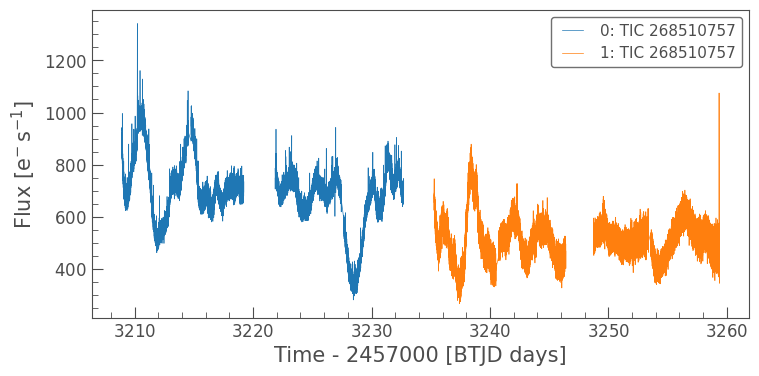

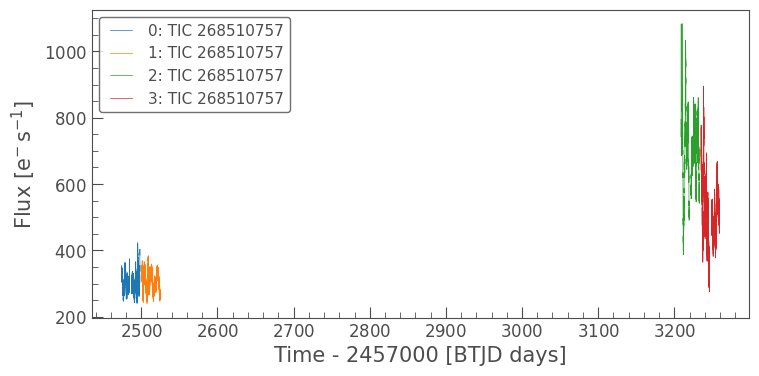

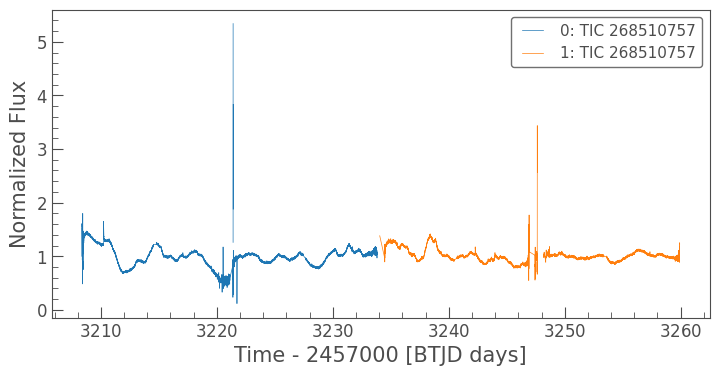

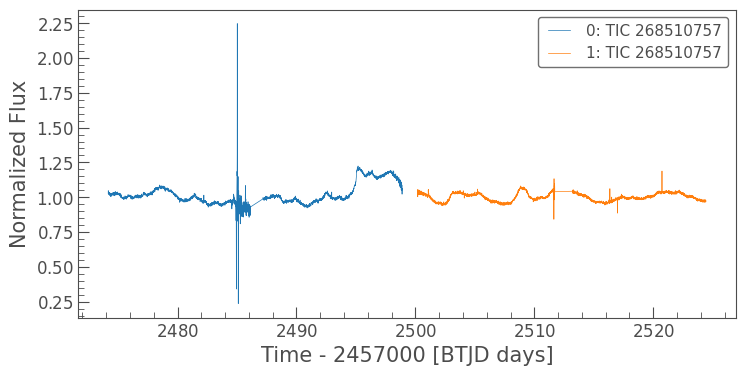

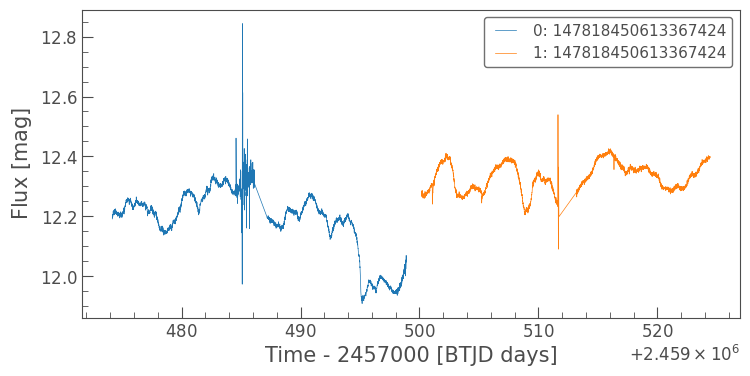

In [ ]:
%matplotlib inline

# SPOC 20s
search_spoc20 = lk.search_lightcurve("TIC 268510757", mission="TESS", author="SPOC", exptime=20)
lc_spoc20 = search_spoc20.download_all()
lc_spoc20.plot(label="SPOC 20s");


# SPOC 120s
search_spoc120 = lk.search_lightcurve("TIC 268510757", mission="TESS", author="SPOC", exptime=120)
lc_spoc120 = search_spoc120.download_all()
lc_spoc120.plot(label="SPOC 120s");


# QLP (200)
search_qlp2 = lk.search_lightcurve("TIC 268510757", mission="TESS", author="QLP", exptime=200)
lc_qlp2 = search_qlp2.download_all()
lc_qlp2.plot(label="QLP 200s");

# QLP (600)
search_qlp6 = lk.search_lightcurve("TIC 268510757", mission="TESS", author="QLP", exptime=600)
lc_qlp6 = search_qlp6.download_all()
lc_qlp6.plot(label="QLP 600s");



# CDIPS (30min 1800s)
search_cdips = lk.search_lightcurve("TIC 268510757", mission="TESS", author="CDIPS", exptime=1800)
lc_cdips = search_cdips.download_all()
lc_cdips.plot(label="CDIPS 1800s");


O gráfico acima mostra as curvas de luz extraídas para o alvo AA Tau, separadas pelos diferentes autores e tempos de exposição. Note que:

- As curvas com exposição de 20 segundos (SPOC 20s) apresentam maior ruído, permitindo a detecção de variações rápidas.
- As curvas com exposição de 1800 segundos (CDIPS) são mais suaves, porém podem perder fenômenos rápidos.
- Setores/arquivos com gaps ou ruído excessivo podem ser descartados para estudos que exigem alta precisão.

**Decisão:** Para estudar variações rápidas, priorizaremos SPOC 20s. Para o caso de tendências de longo prazo, use exposições maiores.

### Como escolher o pipeline ou setor ideal?

- Se o objetivo for detectar períodos curtos e eventos rápidos, priorize exposições curtas (ex: SPOC 20s).
- Se desejar minimizar o ruído e observar tendências de longo prazo, use exposições longas (ex: QLP 600s, CDIPS 1800s).
- Compare resultados de diferentes pipelines (SPOC, QLP, CDIPS, K2SFF, EVEREST) procurando por sinais consistentes em todos, o que pode ser observado graficamente.
- Prefira pipelines mais processados (ex: EVEREST, QLP) se quiser curvas já limpas, mas revise possíveis remoções excessivas de sinal.
- Descarte setores com gaps grandes.

## 5. Repetir o Processo para K2
Buscando e visualizando as curvas de luz de K2 para o mesmo alvo.

In [ ]:

search_resultk21 = lk.search_lightcurve("EPIC 247810494", mission="K2")
search_resultk21
search_resultk22 = lk.search_lightcurve("ktwo247810494", mission="K2")
search_resultk22

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 13,2017,K2,1800,ktwo247810494,0.0
1,K2 Campaign 13,2017,EVEREST,1800,ktwo247810494,0.0
2,K2 Campaign 13,2017,K2SFF,1800,ktwo247810494,0.0


In [ ]:
# K2 1800s
search_k2 = lk.search_lightcurve("ktwo247810494", mission="K2", author="K2", exptime=1800)
print(search_k2)
# EVEREST 1800s
search_everest = lk.search_lightcurve("ktwo247810494", mission="K2", author="EVEREST", exptime=1800)
print(search_everest)
# K2SFF 1800s
search_k2sff = lk.search_lightcurve("ktwo247810494", mission="K2", author="K2SFF", exptime=1800)
print(search_k2sff)


SearchResult containing 1 data products.

 #     mission     year author exptime  target_name  distance
                                  s                   arcsec 
--- -------------- ---- ------ ------- ------------- --------
  0 K2 Campaign 13 2017     K2    1800 ktwo247810494      0.0
SearchResult containing 1 data products.

 #     mission     year  author exptime  target_name  distance
                                   s                   arcsec 
--- -------------- ---- ------- ------- ------------- --------
  0 K2 Campaign 13 2017 EVEREST    1800 ktwo247810494      0.0
SearchResult containing 1 data products.

 #     mission     year author exptime  target_name  distance
                                  s                   arcsec 
--- -------------- ---- ------ ------- ------------- --------
  0 K2 Campaign 13 2017  K2SFF    1800 ktwo247810494      0.0


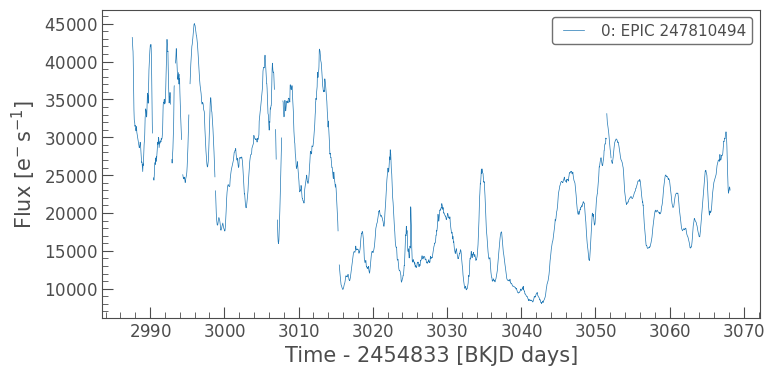

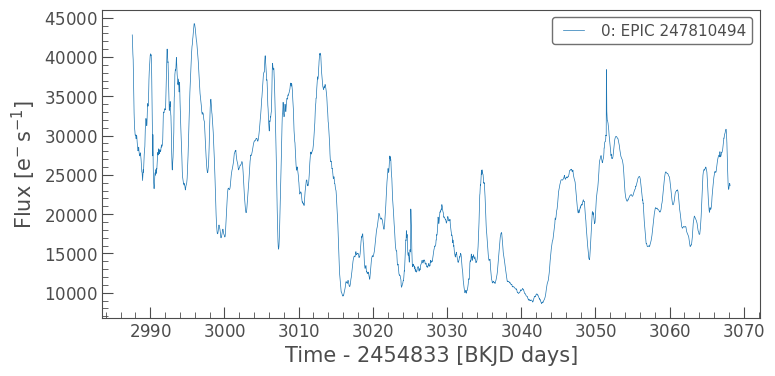

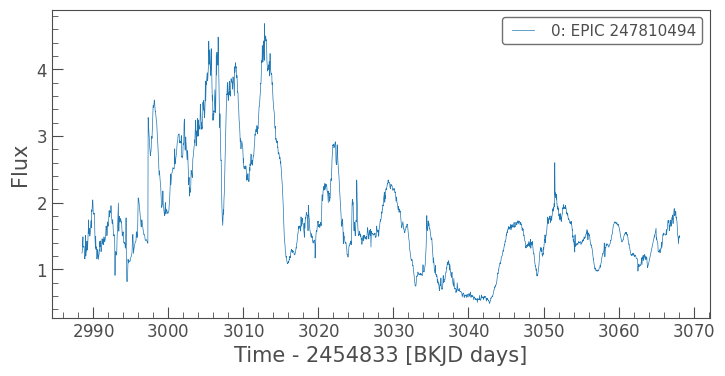

In [ ]:
# k2 1800s
lc_k2 = search_k2.download_all()
lc_k2.plot(label="k2 1800s");


# everest 1800s
lc_everest = search_everest.download_all()
lc_everest.plot(label="everest 1800s");


# k2sff (1800s)
lc_k2sf = search_k2sff.download_all()
lc_k2sf.plot(label="k2sff (1800s)");



In [ ]:
#Como neste caso todas tem o mesmo tempo de exposição, a escolha de qual utilizar tem menos rigor.

## 6. Normalização das Curvas (se ainda não normalizado)

A normalização pode ser aplicada diretamente na função `search_and_plot` com `normalize=True`, como feito acima. Caso deseje normalizar manualmente ou trabalhar com objetos LightCurve, segue exemplo:

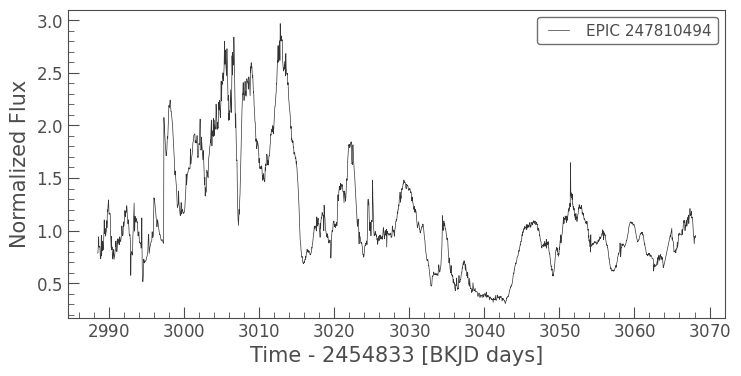

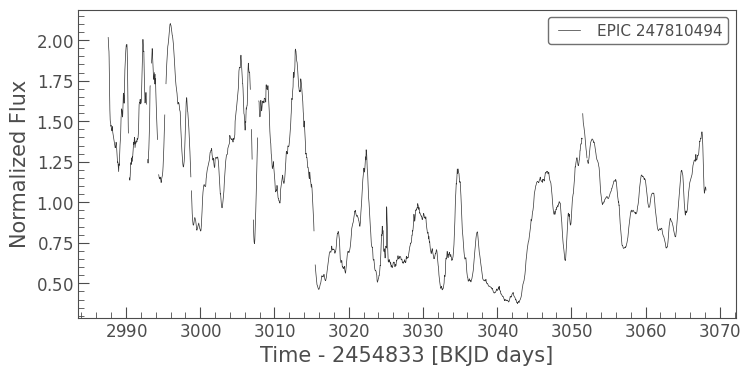

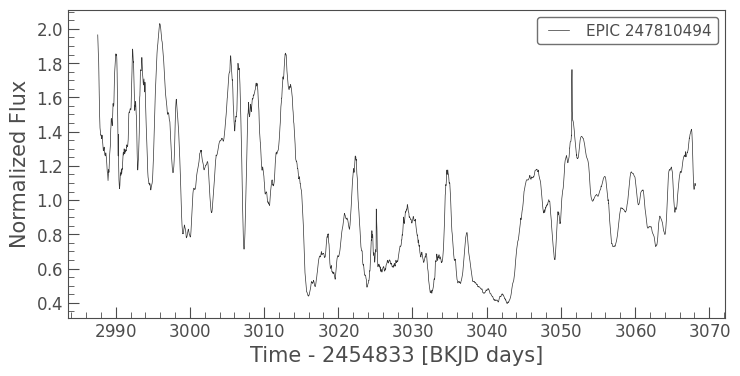

In [ ]:

# Normaliza e plota
if lc_k2sf: #Coleção é uma lista de curvas de luz, obtida anteriormente
  for lc in lc_k2sf:
    lc.normalize().plot()
    #A normalização pega o fluxo da curva de luz e divide por sua mediana, de modo que o valor médio fique em torno de 1.
for lc in lc_k2:
    lc.normalize().plot()
for lc in lc_everest:
    lc.normalize().plot()

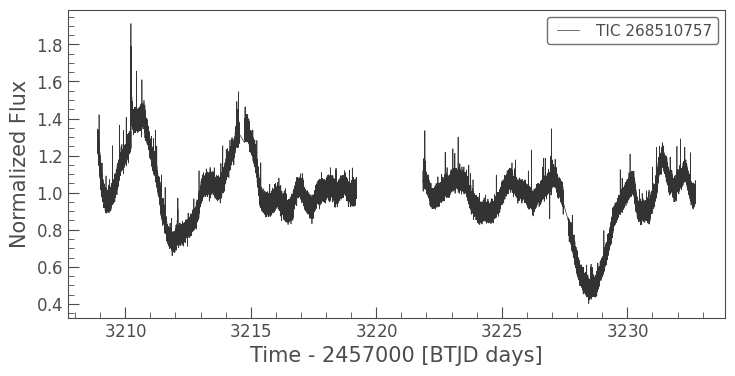

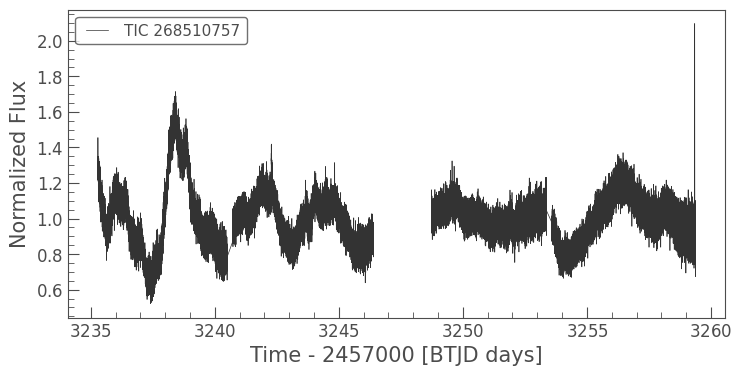

In [ ]:
if lc_spoc20:
  for lc in lc_spoc20:
    lc.normalize().plot()

 Cada um (K2SFF, K2, Everest, SPOC) aplica técnicas diferentes de correção sistemática e extração da curva de luz.

* K2SFF: corrige o drift do telescópio com self flat fielding.

* Everest: usa regressão baseada em pixels para remoção de ruído.

* SPOC: pipeline oficial da NASA para TESS/K2.

* K2 : menos processado, pode conter mais ruídos.





Ao calcular o periodograma para cada versão da curva de luz:

 É possível comparar a consistência dos períodos detectados, verificar se o mesmo sinal astrofísico aparece em diferentes pipelines e ajuda a decidir qual curva de luz seguir adiante, a que mostrar um sinal mais claro, menos ruidoso e consistente.

# Agora plotamos periodogramas para cada setor de cada telescópio:

/usr/local/lib/python3.12/dist-packages/astropy/units/quantity.py:659: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


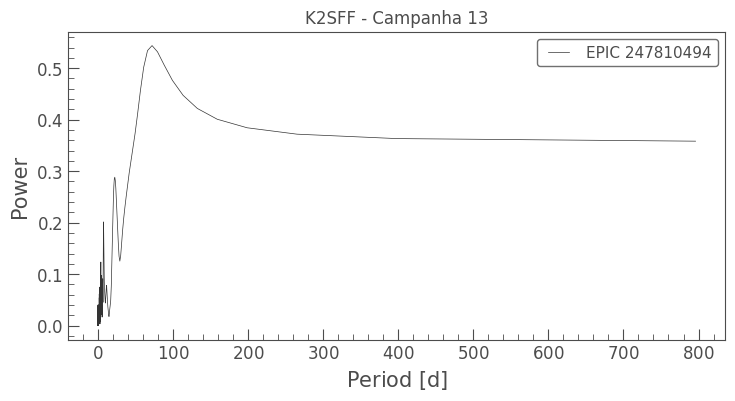

Melhor período (K2SFF): 72.36549863831235 d


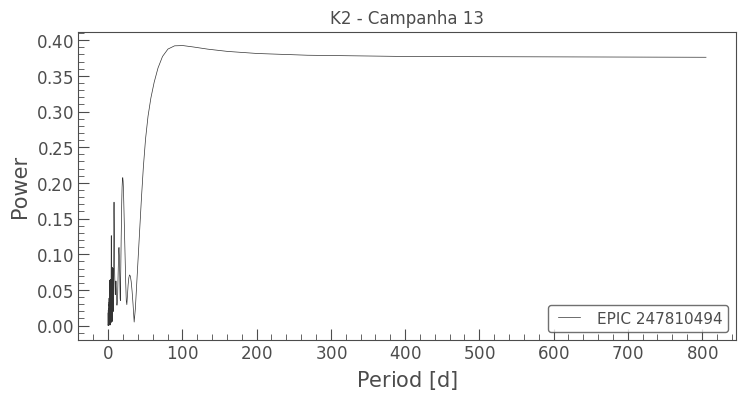

Melhor período (K2): 100.67741315137027 d


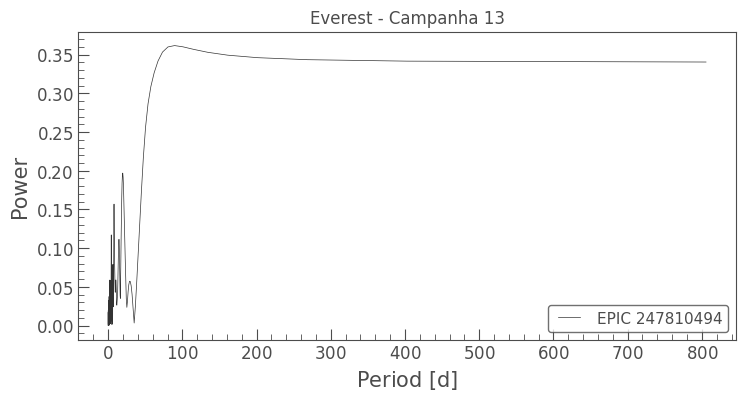

Melhor período (Everest): 89.51373650331838 d


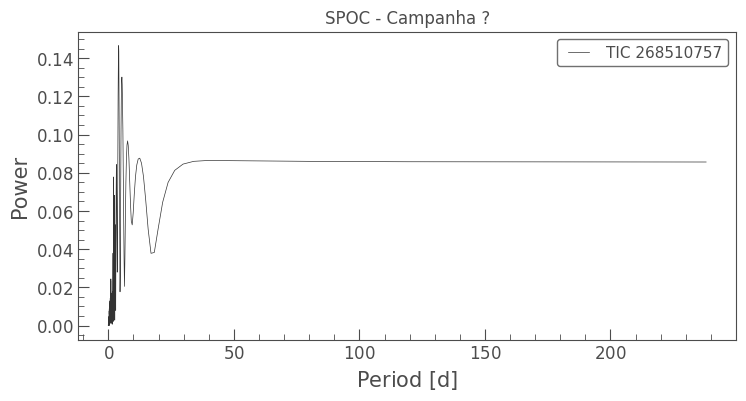

Melhor período (SPOC): 4.104956020255799 d


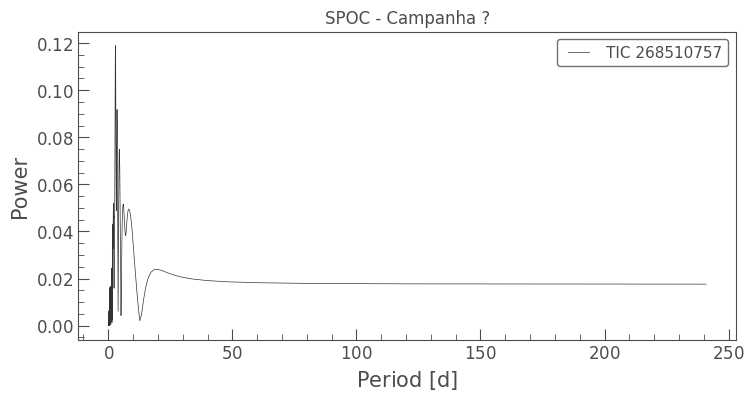

Melhor período (SPOC): 2.868544352298299 d


In [ ]:

# K2SFF
if lc_k2sf:
    for lc in lc_k2sf:
        lc_norm = lc.normalize()
        pg = lc_norm.to_periodogram(oversample_factor=10)
        pg.plot(view="period")   # x = período, o padrão fica 1 dia
        plt.title(f"K2SFF - Campanha {getattr(lc, 'campaign', '?')}") #O getattr(obj, 'atributo', valor_default) faz isso: Tenta pegar obj.atributo. Se não existir, retorna valor_default.
        plt.show()
        print("Melhor período (K2SFF):", pg.period_at_max_power)

# K2
if lc_k2:
    for lc in lc_k2:
        lc_norm = lc.normalize()
        pg = lc_norm.to_periodogram(oversample_factor=10)
        pg.plot(view="period")
        plt.title(f"K2 - Campanha {getattr(lc, 'campaign', '?')}")
        plt.show()
        print("Melhor período (K2):", pg.period_at_max_power)

# Everest
if lc_everest:
    for lc in lc_everest:
        lc_norm = lc.normalize()
        pg = lc_norm.to_periodogram(oversample_factor=10)
        pg.plot(view="period")
        plt.title(f"Everest - Campanha {getattr(lc, 'campaign', '?')}")
        plt.show()
        print("Melhor período (Everest):", pg.period_at_max_power)

  # SPOC 20
if lc_k2sf:
    for lc in lc_spoc20:
        lc_norm = lc.normalize()
        pg = lc_norm.to_periodogram(oversample_factor=10)
        pg.plot(view="period")
        plt.title(f"SPOC - Campanha {getattr(lc, 'campaign', '?')}")
        plt.show()
        print("Melhor período (SPOC):", pg.period_at_max_power)



 --> Normalização (lc.normalize())


*   Remove offsets e coloca a curva de luz em torno de um nível médio (fluxo ≈ 1). Isso permite comparar diferentes campanhas e pipelines sem se preocupar com escalas absolutas de fluxo.

--> Cálculo do periodograma (lc_norm.to_periodogram())

* Transforma a curva de luz do domínio do tempo para o domínio da frequência ou período.

* O parâmetro oversample_factor=10 aumenta a resolução do espectro de potência, ajudando a identificar o período mais provável.

--> Plotagem (pg.plot(view="period"))

* Mostra o poder espectral em função do período.

* O padrão de eixo é em dias, o que facilita a identificação de periodicidades astrofísicas.

--> Identificação do melhor período (pg.period_at_max_power)

* Esse valor indica o período dominante na curva de luz, isto é, o mais forte sinal periódico detectado.

--> Uso de getattr(lc, 'campaign', '?')

* Boa prática: tenta acessar o atributo campaign (informando de qual campanha do K2 vieram os dados). Caso não exista, retorna ?.

* Isso evita erros caso o objeto não tenha esse atributo.

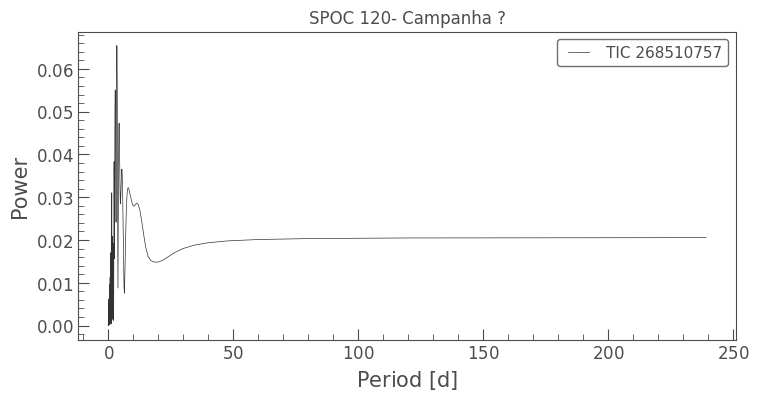

Melhor período (SPOC 120): 3.4151825989553286 d


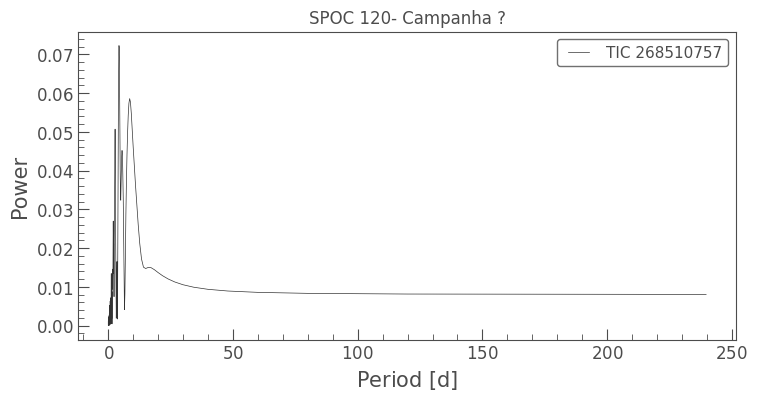

Melhor período (SPOC 120): 4.280518620813934 d


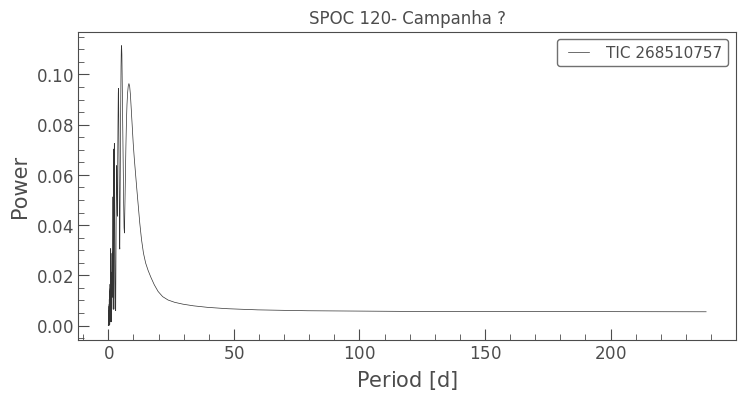

Melhor período (SPOC 120): 5.290266314191488 d


/usr/local/lib/python3.12/dist-packages/astropy/units/quantity.py:659: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


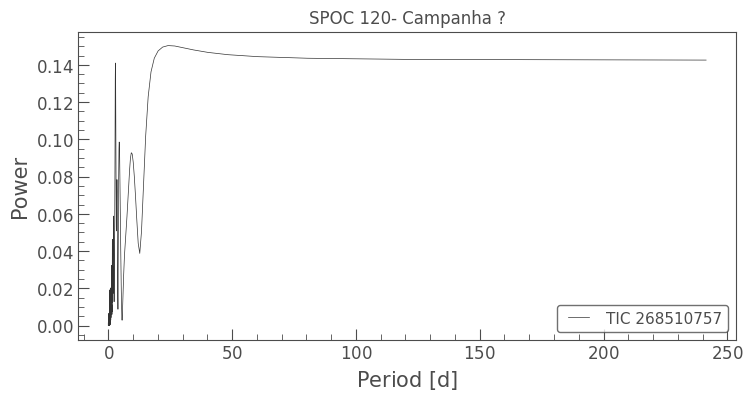

TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')


Melhor período (SPOC 120): 24.144387306285807 d


TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')


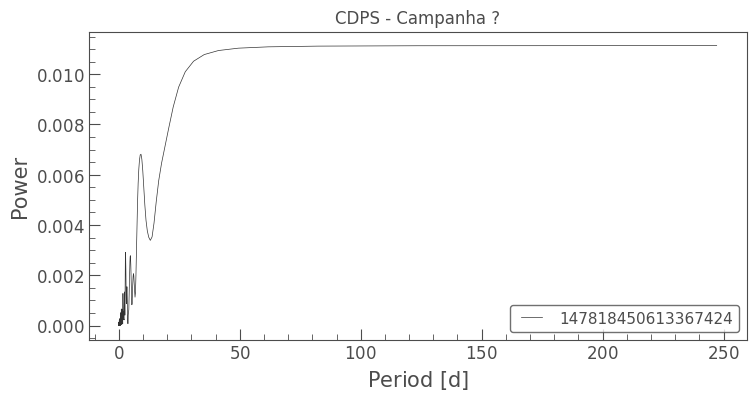

TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')
TypeError('The value must be a valid Python or Numpy numeric type.') [astropy.table.table]
TypeError('The value must be a valid Python or Numpy numeric type.')


Melhor período (CDPS): 247.17448743991554 d


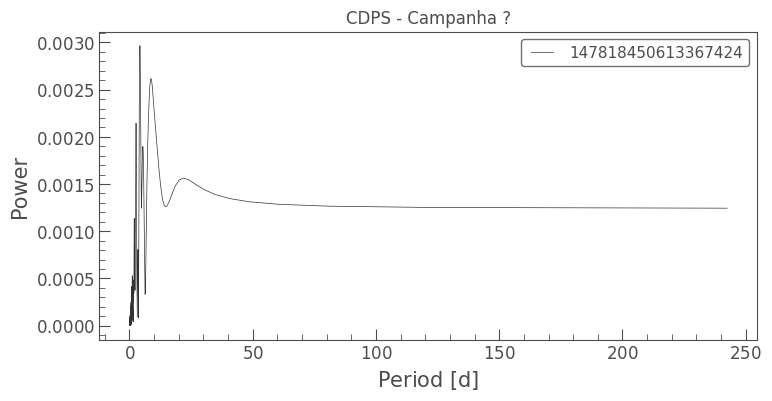

Melhor período (CDPS): 4.329381769389978 d


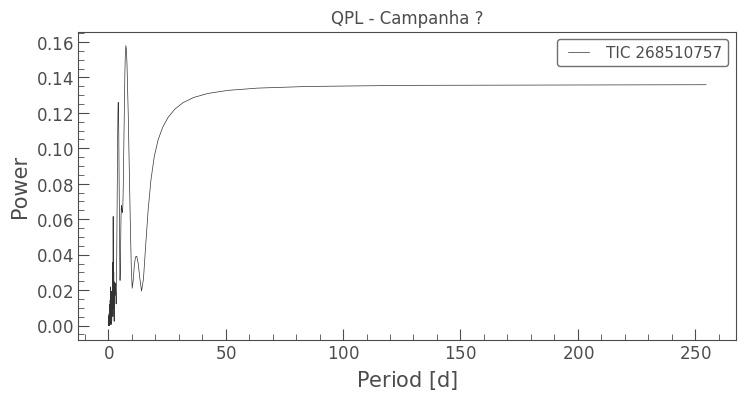

Melhor período (QPL): 7.489741329424277 d


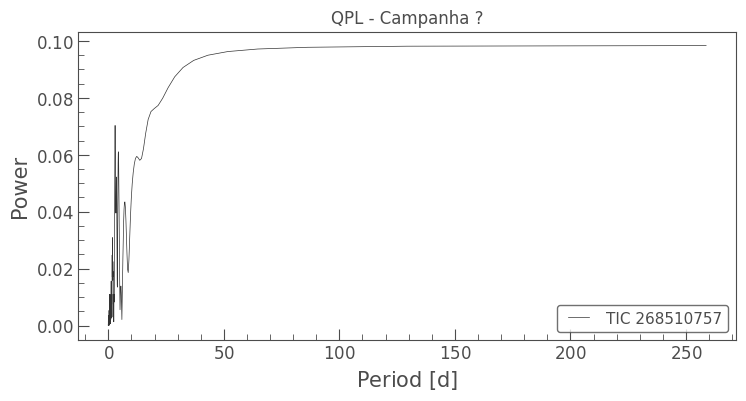

Melhor período (QPL): 258.69489461421836 d


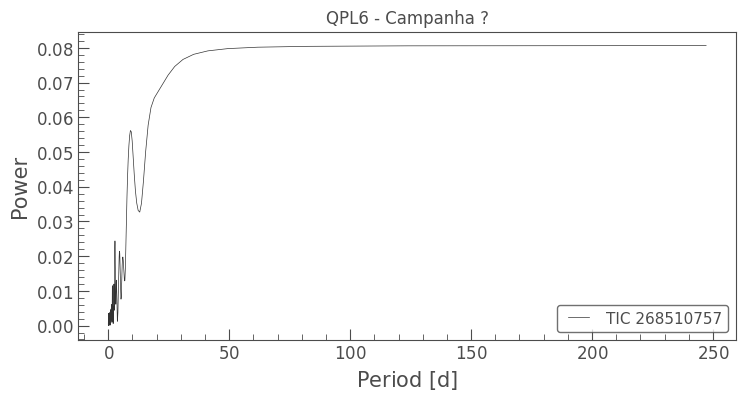

Melhor período (QPL6): 247.17449141931863 d


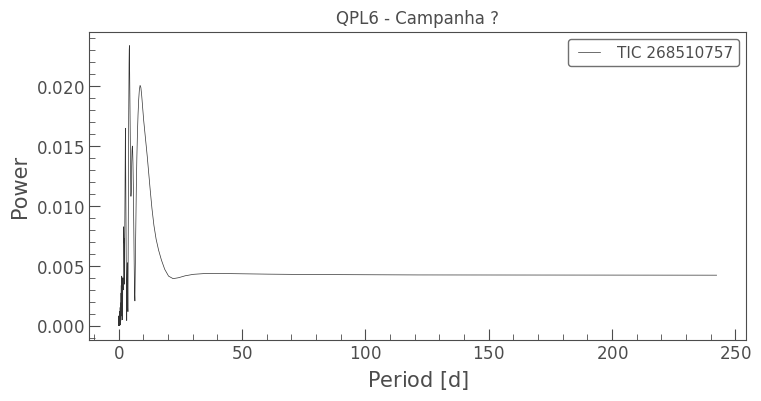

Melhor período (QPL6): 4.329381761102127 d


In [ ]:
#Os outros periodogramas:

  # SPOC 120
if lc_spoc120:
    for lc in lc_spoc120:
        lc_norm = lc.normalize()
        pg = lc_norm.to_periodogram(oversample_factor=10)
        pg.plot(view="period")
        plt.title(f"SPOC 120- Campanha {getattr(lc, 'campaign', '?')}")
        plt.show()
        print("Melhor período (SPOC 120):", pg.period_at_max_power)

# CDPS
if lc_cdips:
    for lc in lc_cdips:
        lc_norm = lc.normalize()
        pg = lc_norm.to_periodogram(oversample_factor=10)
        pg.plot(view="period")
        plt.title(f"CDPS - Campanha {getattr(lc, 'campaign', '?')}")
        plt.show()
        print("Melhor período (CDPS):", pg.period_at_max_power)

# CDPS
if lc_qlp2:
    for lc in lc_qlp2:
        lc_norm = lc.normalize()
        pg = lc_norm.to_periodogram(oversample_factor=10)
        pg.plot(view="period")
        plt.title(f"QPL - Campanha {getattr(lc, 'campaign', '?')}")
        plt.show()
        print("Melhor período (QPL):", pg.period_at_max_power)

    # qpl6
if lc_qlp6:
    for lc in lc_qlp6:
        lc_norm = lc.normalize()
        pg = lc_norm.to_periodogram(oversample_factor=10)
        pg.plot(view="period")
        plt.title(f"QPL6 - Campanha {getattr(lc, 'campaign', '?')}")
        plt.show()
        print("Melhor período (QPL6):", pg.period_at_max_power)

### Interpretação

O periodograma acima mostra os principais períodos detectados nas curvas de luz processadas por diferentes pipelines.

- Picos altos correspondem a períodos de variação mais prováveis.
- Se o mesmo pico aparece em vários pipelines, aumenta a confiança de que é um sinal real.
- Discrepâncias podem indicar ruído ou artefatos específicos de cada pipeline.

**Próximo passo:** Escolher a curva de luz cujo periodograma apresenta o sinal mais limpo e consistente para análise detalhada.

## 7. Conclusão

- O notebook demonstrou como buscar, separar, normalizar e plotar curvas de luz de diferentes missões e configurações.
- O uso de funções auxiliares permite reaproveitamento e facilita a comparação entre conjuntos de dados.
- As decisões científicas sobre qual curva utilizar devem ser baseadas nos objetivos do estudo (variações rápidas vs. suavidade, ruído, etc).


## 8. Referências
- [Documentação Lightkurve](https://docs.lightkurve.org/)
- [TESS Mission](https://tess.mit.edu/)
- [K2 Mission](https://keplerscience.arc.nasa.gov/k2.html)
- [Astropy](https://www.astropy.org/)